Setup

In [16]:
import tensorflow as tf
from matplotlib import pyplot as plt
import os
import cv2
import imghdr

In [31]:
data_dir = 'data/Clothes/'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [32]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    print(image_class)

Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear
Bottomwear

In [37]:
img = cv2.imread(os.path.join(data_dir, 'Bottomwear', '1567.jpg'))

In [38]:
print(img)

[[[124 148 190]
  [125 149 191]
  [127 151 193]
  ...
  [140 168 202]
  [139 167 201]
  [138 166 200]]

 [[114 138 180]
  [114 138 180]
  [115 139 181]
  ...
  [127 155 189]
  [126 154 188]
  [126 154 188]]

 [[113 138 180]
  [113 138 180]
  [112 137 179]
  ...
  [111 141 176]
  [112 142 177]
  [112 142 177]]

 ...

 [[193 198 201]
  [193 198 201]
  [193 198 201]
  ...
  [192 199 202]
  [192 199 202]
  [192 199 202]]

 [[193 198 201]
  [193 198 201]
  [193 198 201]
  ...
  [192 199 202]
  [192 199 202]
  [192 199 202]]

 [[195 200 203]
  [194 199 202]
  [193 198 201]
  ...
  [193 200 203]
  [193 200 203]
  [192 199 202]]]


In [39]:
img.shape

(2401, 1800, 3)

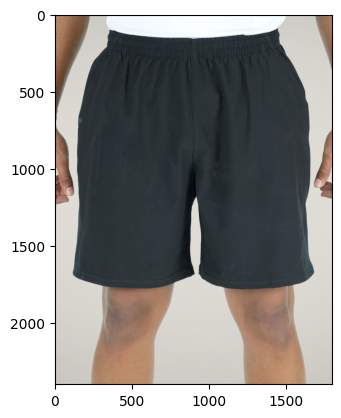

In [40]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [41]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [42]:
import numpy as np

In [17]:
data = tf.keras.utils.image_dataset_from_directory('data/Clothes/')

Found 18090 files belonging to 2 classes.


In [21]:
data_iterator = data.as_numpy_iterator()

In [23]:
batch = data_iterator.next()

In [52]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [53]:
batch[1]

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

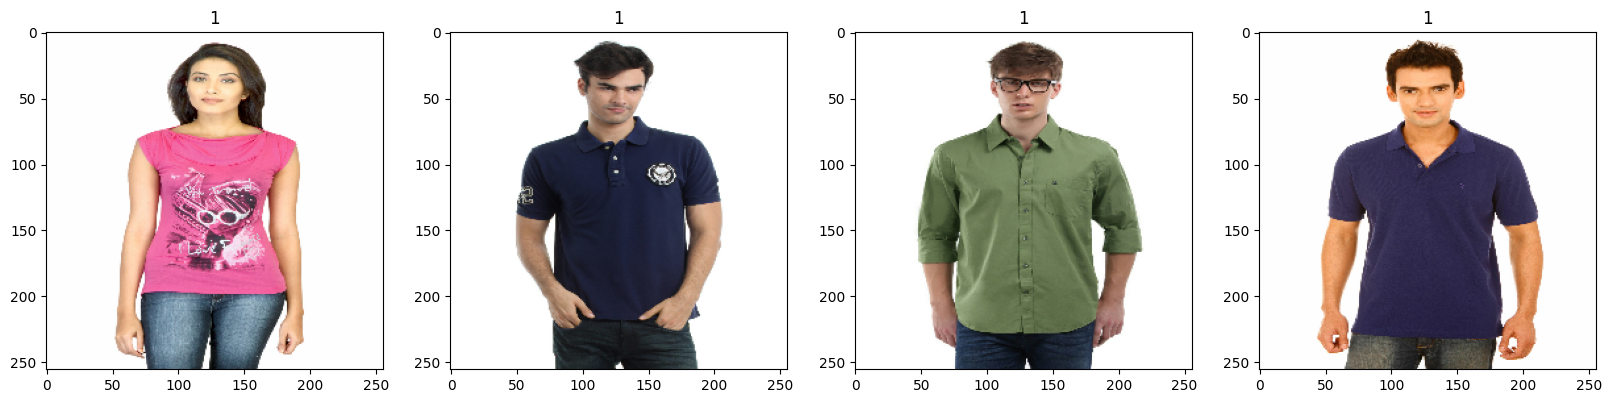

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [54]:
scaled = batch[0] / 255

In [55]:
data = data.map(lambda x, y: (x/255, y))

In [58]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [59]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [61]:
model = Sequential()

In [62]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [63]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [65]:
logdir = 'logs'

In [66]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [69]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [70]:
hist = model.fit(train, epochs=20, batch_size=30000, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
396/396 [==============================] - 226s 569ms/step - loss: 0.0373 - accuracy: 0.9893 - val_loss: 0.0300 - val_accuracy: 0.9898
Epoch 2/20
396/396 [==============================] - 229s 577ms/step - loss: 0.0233 - accuracy: 0.9938 - val_loss: 0.0212 - val_accuracy: 0.9923
Epoch 3/20
396/396 [==============================] - 227s 571ms/step - loss: 0.0128 - accuracy: 0.9963 - val_loss: 0.0328 - val_accuracy: 0.9892
Epoch 4/20
396/396 [==============================] - 226s 569ms/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.0232 - val_accuracy: 0.9925
Epoch 5/20
396/396 [==============================] - 226s 569ms/step - loss: 0.0054 - accuracy: 0.9990 - val_loss: 0.0351 - val_accuracy: 0.9920
Epoch 6/20
396/396 [==============================] - 227s 571ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.0351 - val_accuracy: 0.9906
Epoch 7/20
396/396 [==============================] - 228s 573ms/step - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.0345 -

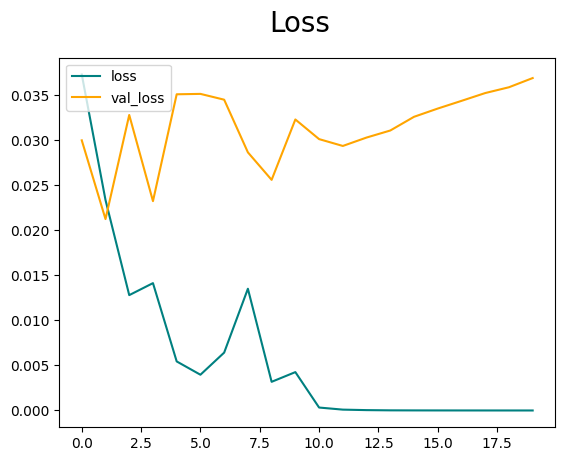

In [71]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

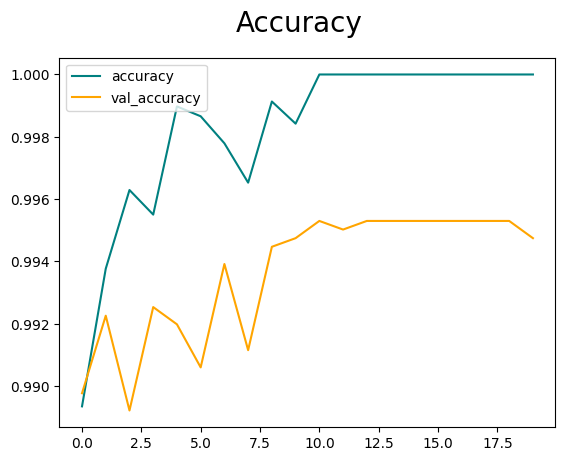

In [72]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [73]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [74]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [75]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 91ms/step


In [76]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9967363, shape=(), dtype=float32) tf.Tensor(0.99738735, shape=(), dtype=float32) tf.Tensor(0.99497765, shape=(), dtype=float32)


In [6]:
import cv2

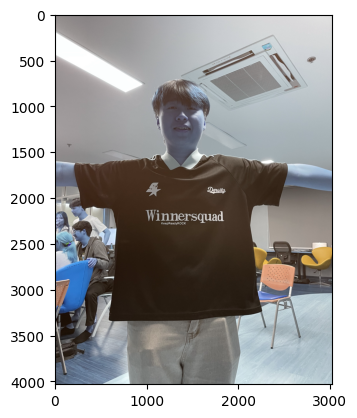

In [25]:
img = cv2.imread(os.path.join('data\Test\Topwear', 'Park.jpg'))
plt.imshow(img)
plt.show()

In [10]:
bgr = img[300, 300]
rgb = bgr[::-1]
print(rgb)

[154 155 160]


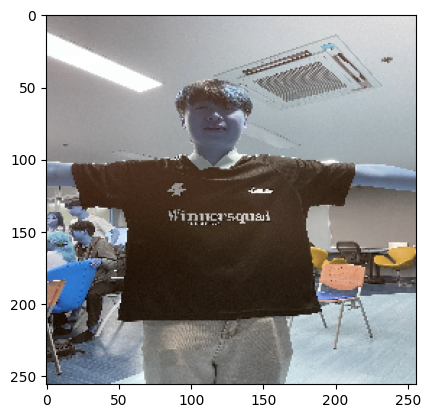

In [26]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [163]:
yhat

array([[0.99999523]], dtype=float32)

In [164]:
if yhat > 0.5:
    print(f'Predicted class is Topwear')
else:
    print(f'Predicted class is Bottomwear')

Predicted class is Topwear


In [27]:
from tensorflow.keras.models import load_model
import os
import numpy as np

In [140]:
model.save(os.path.join('models', 'JARPOON.h5'))

c:\Users\Nickv\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
new_model = load_model(os.path.join('models', 'JARPOON.h5'))

In [29]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 65ms/step


In [14]:
yhatnew

array([[1.]], dtype=float32)

In [15]:
if yhatnew > 0.5:
    print(f'Predicted class is Topwear')
else:
    print(f'Predicted class is Bottomwear')

Predicted class is Topwear
